**Guided Project - Visualizing Earnings Based On College Majors**  
  
In this course, we've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.  
  
In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.  

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.   
  
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.  

In [85]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# Data
recent_grads = pd.read_csv("data/recent-grads.csv")
recent_grads.describe()

Rank   Major_code          Total  Sample_size            Men  \
count  173.000000   173.000000     173.000000   173.000000     173.000000   
mean    87.000000  3879.815029   39167.716763   356.080925   16637.358382   
std     50.084928  1687.753140   63354.613919   618.361022   28063.394844   
min      1.000000  1100.000000     124.000000     2.000000     119.000000   
25%     44.000000  2403.000000    4361.000000    39.000000    2110.000000   
50%     87.000000  3608.000000   15058.000000   130.000000    5347.000000   
75%    130.000000  5503.000000   38844.000000   338.000000   14440.000000   
max    173.000000  6403.000000  393735.000000  4212.000000  173809.000000   

               Women  ShareWomen       Employed      Full_time      Part_time  \
count     173.000000  173.000000     173.000000     173.000000     173.000000   
mean    22530.358382    0.522550   31192.763006   26029.306358    8832.398844   
std     40966.381219    0.230572   50675.002241   42869.655092   14648.179473   
min         0.000000    0.000000       0.000000     111.000000       0.000000   
25%      1784.000000    0.339671    3608.000000    3154.000000    1030.000000   
50%      8284.000000    0.535714   11797.000000   10048.000000    3299.000000   
75%     22456.000000    0.702020   31433.000000   25147.000000    9948.000000   
max    307087.000000    0.968954  307933.000000  251540.000000  115172.000000   

       Full_time_year_round    Unemployed  Unemployment_rate         Median  \
count            173.000000    173.000000         172.000000     173.000000   
mean           19694.427746   2416.329480           0.068587   40151.445087   
std            33160.941514   4112.803148           0.029967   11470.181802   
min              111.000000      0.000000           0.000000   22000.000000   
25%             2453.000000    304.000000           0.050723   33000.000000   
50%             7413.000000    893.000000           0.068272   36000.000000   
75%            16891.000000   2393.000000           0.087599   45000.000000   
max           199897.000000  28169.000000           0.177226  110000.000000   

              P25th          P75th   College_jobs  Non_college_jobs  \
count    173.000000     173.000000     173.000000        173.000000   
mean   29501.445087   51494.219653   12322.635838      13284.497110   
std     9166.005235   14906.279740   21299.868863      23789.655363   
min    18500.000000   22000.000000       0.000000          0.000000   
25%    24000.000000   42000.000000    1675.000000       1591.000000   
50%    27000.000000   47000.000000    4390.000000       4595.000000   
75%    33000.000000   60000.000000   14444.000000      11783.000000   
max    95000.000000  125000.000000  151643.000000     148395.000000   

       Low_wage_jobs  
count     173.000000  
mean     3859.017341  
std      6944.998579  
min         0.000000  
25%       340.000000  
50%      1231.000000  
75%      3466.000000  
max     48207.000000

In [87]:
# Summary
print(recent_grads.iloc[0])
print(recent_grads.head(2))
print(recent_grads.tail(2))

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Major_category                    Engineering
Total                                    2339
Sample_size                                36
Men                                      2057
Women                                     282
ShareWomen                           0.120564
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [88]:
# Get shape of dataframe
raw_data_count,c = recent_grads.shape
print(raw_data_count)
# Drop rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count,c = recent_grads.shape
print(cleaned_data_count)

173
172


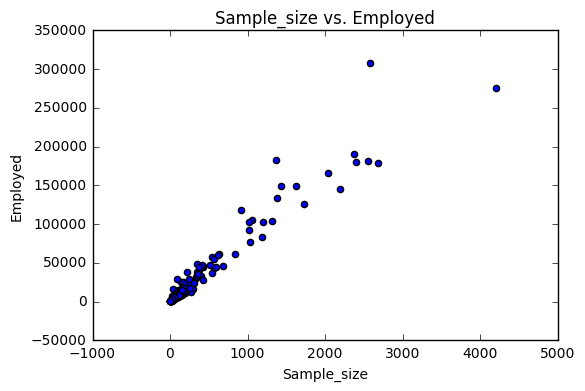

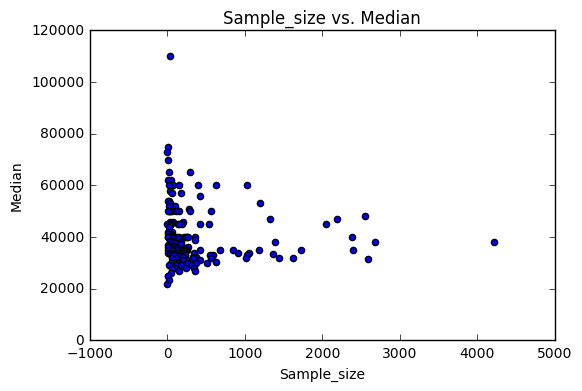

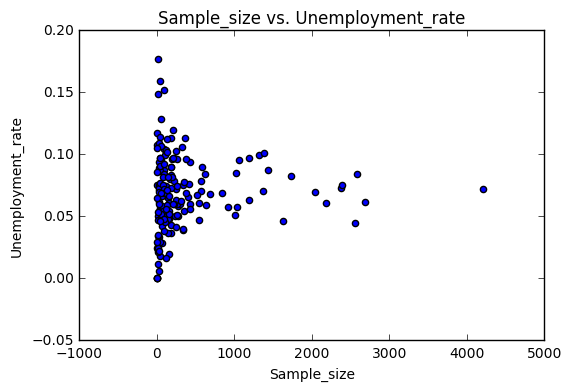

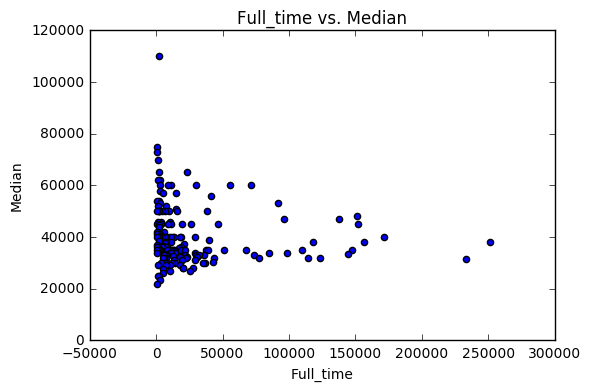

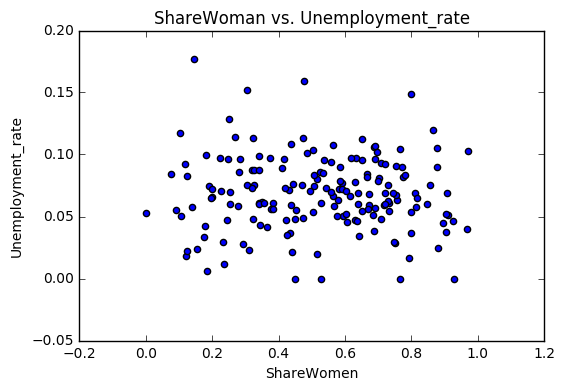

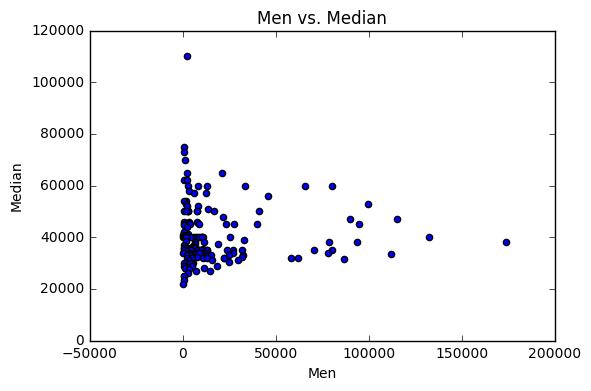

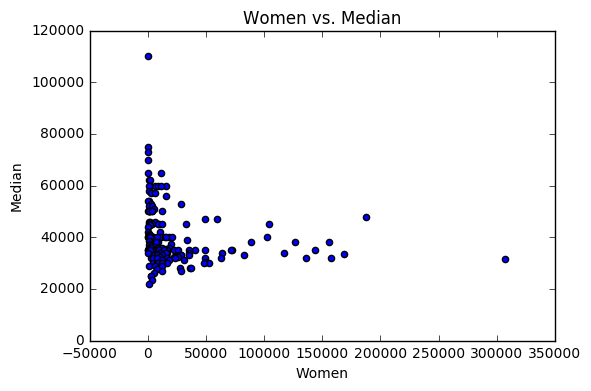

In [158]:
# Pandas, Scatter Plots
ax1 = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter',title='Sample_size vs. Employed')
ax2 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter',title='Sample_size vs. Median')
ax3 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter',title='Sample_size vs. Unemployment_rate')
ax4 = recent_grads.plot(x='Full_time', y='Median', kind='scatter',title='Full_time vs. Median')
ax5 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter',title='ShareWoman vs. Unemployment_rate')
ax6 = recent_grads.plot(x='Men', y='Median', kind='scatter',title='Men vs. Median')
ax7 = recent_grads.plot(x='Women', y='Median', kind='scatter',title='Women vs. Median')

In [160]:
recent_grads["Unemployment_percent"] = (recent_grads["Unemployment_rate"]*100)
topPay = recent_grads.pivot_table(index=["Major"],values=["Median","Unemployment_percent","Total"])
topPay.sort_values(by=("Median"),ascending=False).head(22)

Median   Total  \
Major                                                       
PETROLEUM ENGINEERING                      110000    2339   
MINING AND MINERAL ENGINEERING              75000     756   
METALLURGICAL ENGINEERING                   73000     856   
NAVAL ARCHITECTURE AND MARINE ENGINEERING   70000    1258   
NUCLEAR ENGINEERING                         65000    2573   
CHEMICAL ENGINEERING                        65000   32260   
ACTUARIAL SCIENCE                           62000    3777   
ASTRONOMY AND ASTROPHYSICS                  62000    1792   
MECHANICAL ENGINEERING                      60000   91227   
COMPUTER ENGINEERING                        60000   41542   
MATERIALS SCIENCE                           60000    4279   
AEROSPACE ENGINEERING                       60000   15058   
BIOMEDICAL ENGINEERING                      60000   14955   
ELECTRICAL ENGINEERING                      60000   81527   
ENGINEERING MECHANICS PHYSICS AND SCIENCE   58000    4321   
BIOLOGICAL ENGINEERING                      57100    8925   
INDUSTRIAL AND MANUFACTURING ENGINEERING    57000   18968   
GENERAL ENGINEERING                         56000   61152   
COURT REPORTING                             54000    1148   
ARCHITECTURAL ENGINEERING                   54000    2825   
FOOD SCIENCE                                53000    4361   
COMPUTER SCIENCE                            53000  128319   

                                           Unemployment_percent  
Major                                                            
PETROLEUM ENGINEERING                                  1.838053  
MINING AND MINERAL ENGINEERING                        11.724138  
METALLURGICAL ENGINEERING                              2.409639  
NAVAL ARCHITECTURE AND MARINE ENGINEERING              5.012531  
NUCLEAR ENGINEERING                                   17.722641  
CHEMICAL ENGINEERING                                   6.109771  
ACTUARIAL SCIENCE                                      9.565217  
ASTRONOMY AND ASTROPHYSICS                             2.116741  
MECHANICAL ENGINEERING                                 5.734228  
COMPUTER ENGINEERING                                   6.540928  
MATERIALS SCIENCE                                      2.304284  
AEROSPACE ENGINEERING                                  6.516208  
BIOMEDICAL ENGINEERING                                 9.208386  
ELECTRICAL ENGINEERING                                 5.917385  
ENGINEERING MECHANICS PHYSICS AND SCIENCE              0.633434  
BIOLOGICAL ENGINEERING                                 8.714307  
INDUSTRIAL AND MANUFACTURING ENGINEERING               4.287554  
GENERAL ENGINEERING                                    5.982423  
COURT REPORTING                                        1.168969  
ARCHITECTURAL ENGINEERING                              6.193078  
FOOD SCIENCE                                           9.693146  
COMPUTER SCIENCE                                       6.317277

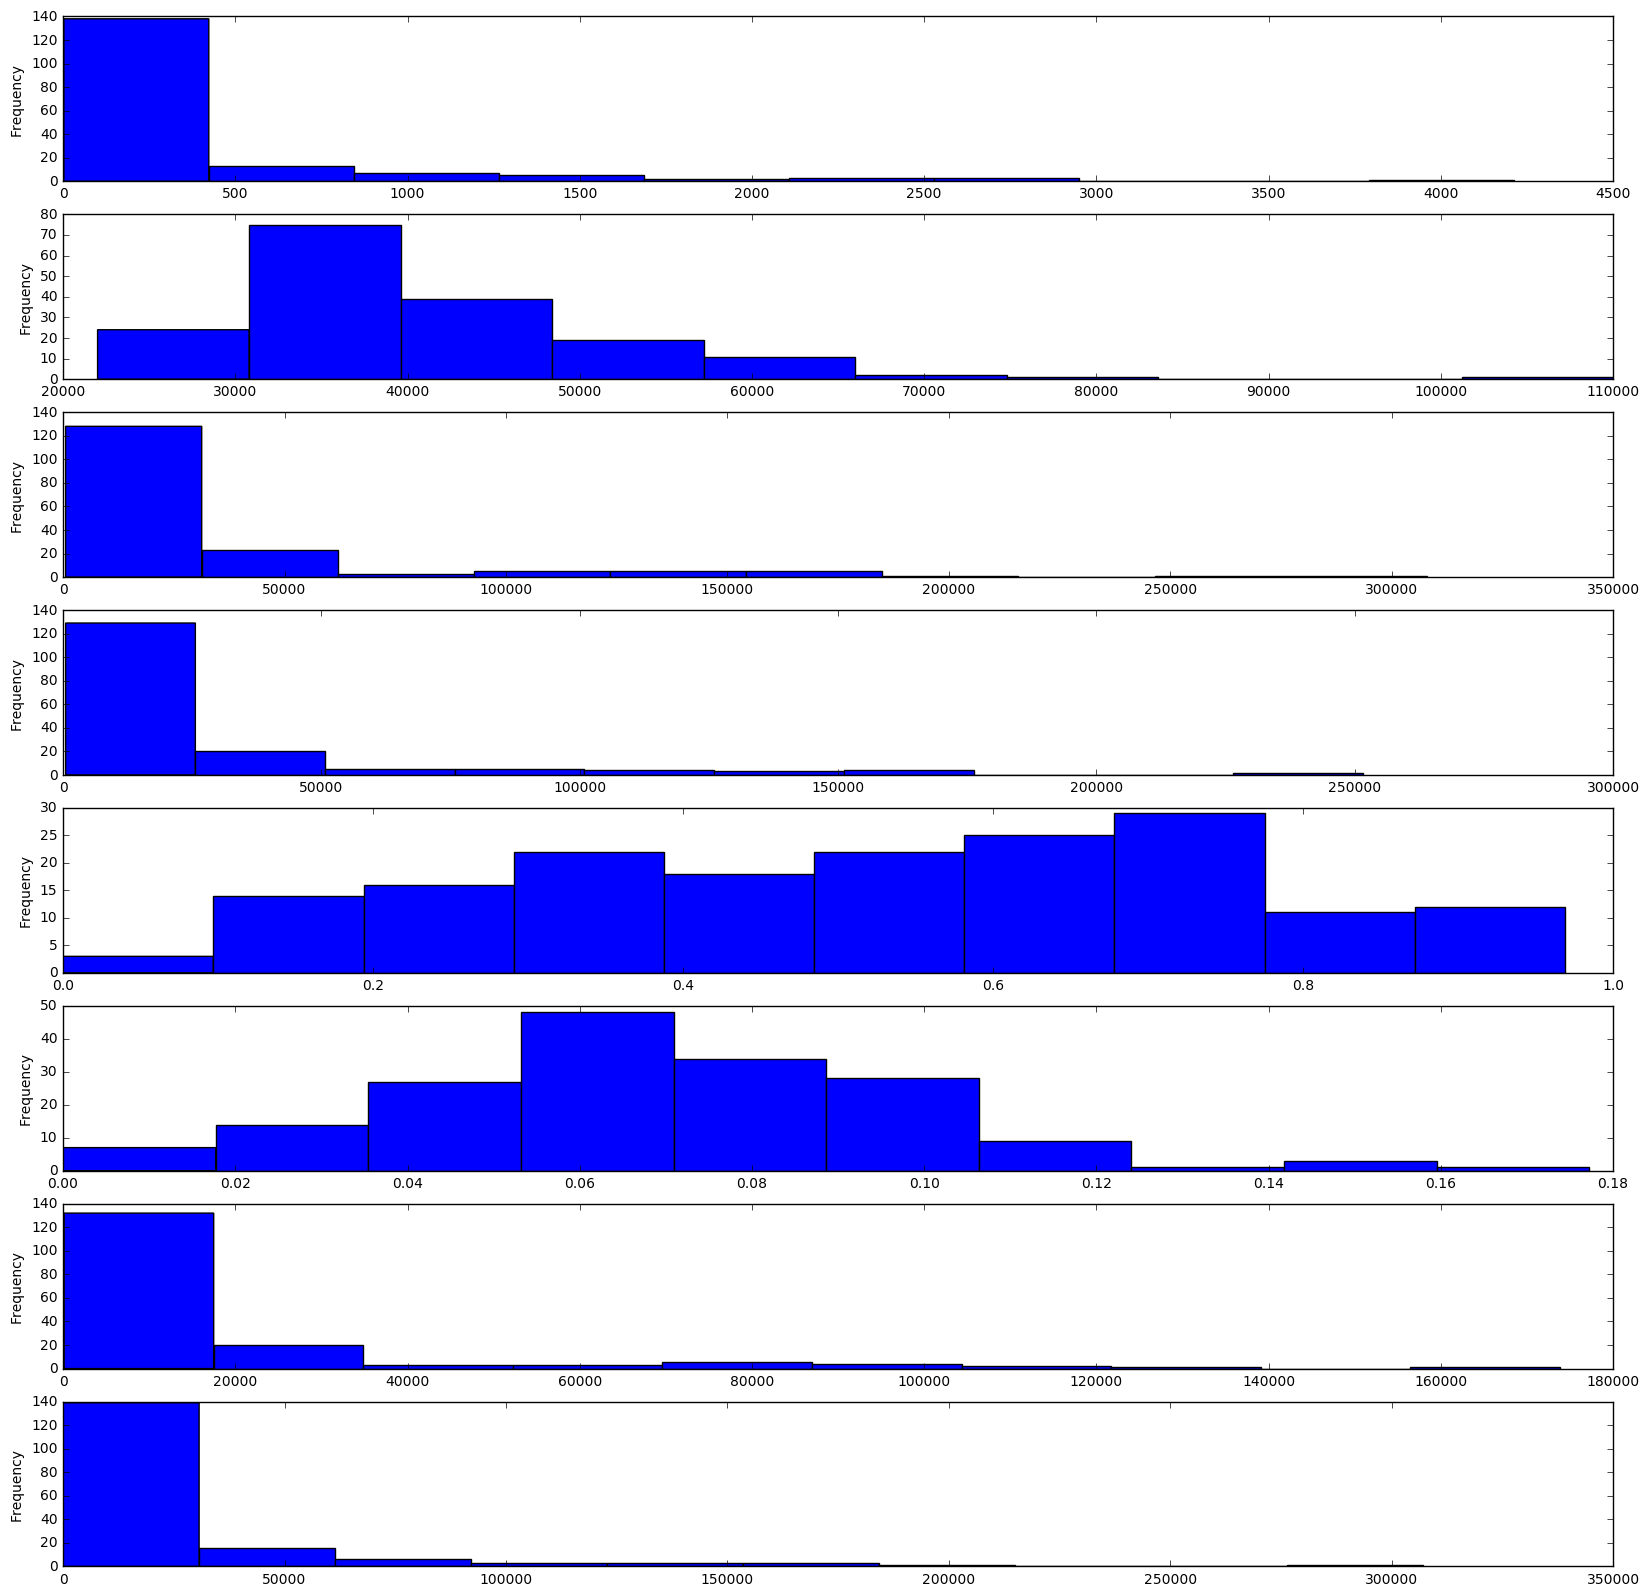

In [195]:
# Pandas, Histograms
fig, axes = plt.subplots(8,1,figsize=(20,20))
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
for i, c in enumerate(cols):
    recent_grads[c].plot(ax=axes[i],kind='hist')

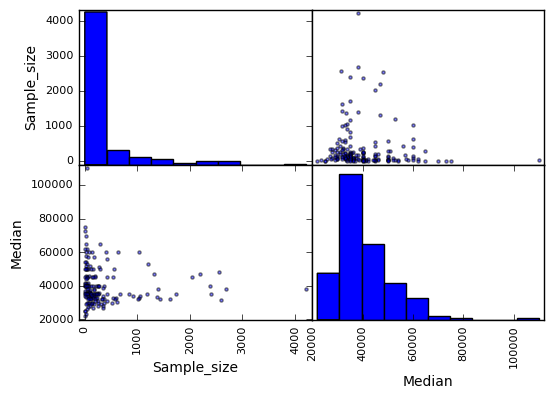

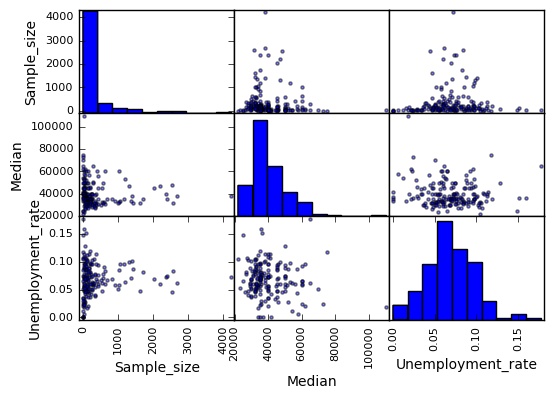

In [206]:
# Pandas, Scatter Matrix Plot
fig1 = pd.scatter_matrix(recent_grads[['Sample_size','Median']])
fig2 = pd.scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']])

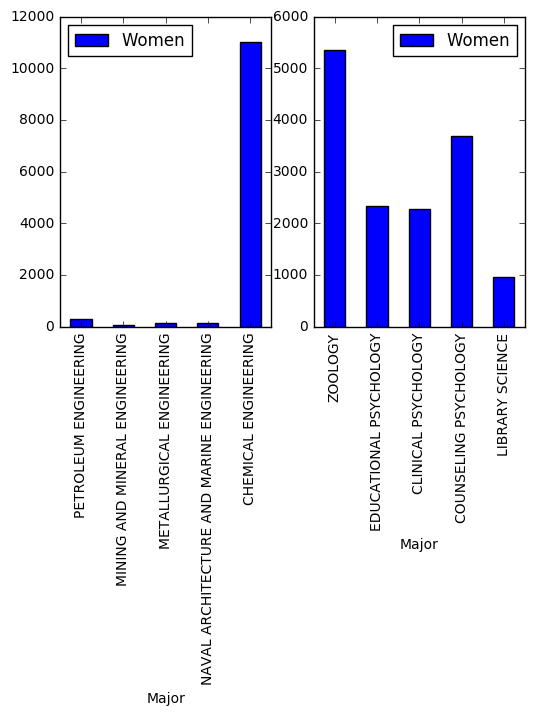

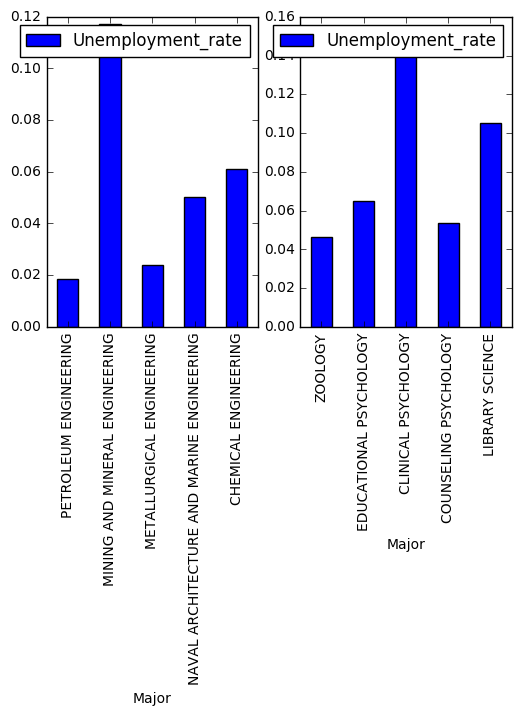

In [226]:
# Pandas, Bar Plots
fig, ax = plt.subplots(1,2)
recent_grads[:5].plot(ax=ax[0],kind='bar', x='Major',y='Women')
numRows = recent_grads.shape
recent_grads[numRows[0]-5:numRows[0]].plot(ax=ax[1],kind='bar', x='Major',y='Women')
plt.show()

fig, ax = plt.subplots(1,2)
recent_grads[:5].plot(ax=ax[0],kind='bar',x='Major',y='Unemployment_rate')
recent_grads[numRows[0]-5:numRows[0]].plot(ax=ax[1],kind='bar',x='Major',y='Unemployment_rate')
plt.show()